## Mitron Bank New Credit Card Line Analysis

### Mitron Bank is a legacy financial institution headquartered in Hyderabad. They want to introduce a new line of credit cards, aiming to broaden its product offerings and reach in the financial market.

### Try to Identify key Customer Segments that are Likely to be the Highest-Value Users of the `New Credit Cards`.

In [1]:
# import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")



In [2]:
# uplode the csv dataset 
df_cust = pd.read_csv("dim_customers.csv")
df_spend = pd.read_csv("fact_spends.csv")

In [3]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [4]:
df_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [5]:
df_cust.shape

(4000, 7)

In [6]:
df_spend.shape

(864000, 5)

In [7]:
df_cust.duplicated().sum()

0

In [8]:
df_cust.isna().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

In [9]:
df_spend.duplicated().sum()

0

In [10]:
df_spend.isna().sum()

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

It Looks Like the dataset does not contane any null or missing Values


## Analyszing


In [11]:
df_cust.head(5)

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [12]:
df_spend.head(5)

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


Classify the customers based on available demography such as age group, gender, occupation

In [13]:
# Count Of Customer ciyt wise
df_cust.groupby("city")["customer_id"].count().sort_values(ascending=False) 

city
Mumbai       1078
Chennai       834
Bengaluru     751
Delhi NCR     744
Hyderabad     593
Name: customer_id, dtype: int64

In [14]:
# Number of customer based on Gender and Marital Status
df_cust.groupby(["gender","marital status"])["customer_id"].count().sort_values(ascending=False).reset_index()

,gender,marital status,customer_id
0,Male,Married,2000
1,Female,Married,1136
2,Male,Single,597
3,Female,Single,267


In [15]:
# Number of customer belongs to age group
df_cust.groupby("age_group")["customer_id"].count().sort_values(ascending=False)

age_group
25-34    1498
35-45    1273
21-24     691
45+       538
Name: customer_id, dtype: int64

In [16]:
# average income to age groups
round(df_cust.pivot_table(values="avg_income",index="age_group",aggfunc="mean"),2).sort_values(by="avg_income",ascending=False) 

,avg_income
age_group,
45+,61047.57
35-45,53425.95
25-34,51827.08
21-24,40718.27


Here we can see a clear difference between age group of (21-24) to (45+) as expected.But no noticeable Difference between (25-34) and (35-45)

Merge two DataFrame on Customer ID for batter understanding

In [17]:
# Avg. spend by age groups
Merged_df = df_cust.merge(df_spend,on="customer_id")


In [18]:
# Add a column to the Merged_df to calculate avg_monthly_spend
Merged_df["Avg_monthly_spend"] = (df_spend["spend"])/(4000*6)

In [19]:
Merged_df.groupby("age_group")["Avg_monthly_spend"].sum().sort_values(ascending=False)


age_group
25-34    8276.294542
35-45    7035.850125
21-24    3810.629542
45+      2997.965583
Name: Avg_monthly_spend, dtype: float64

It looks like indivisuals in the 25-35 and 35-45 age groups are the like to spend more.But indivisuals in 45+ age group are lowest spender though they are the highers earning group.

In [20]:
# find a relation between average income to city
round(df_cust.pivot_table(values="avg_income",index="city"),2).sort_values(by="avg_income",ascending=False) 

,avg_income
city,
Hyderabad,52344.81
Delhi NCR,51982.66
Mumbai,51720.31
Chennai,51321.39
Bengaluru,51073.26


In [33]:
round(Merged_df.pivot_table(values="spend",index="city",aggfunc="mean"),2).sort_values(by="spend",ascending=False) 

,spend
city,
Mumbai,738.84
Delhi NCR,693.51
Bengaluru,616.57
Hyderabad,527.14
Chennai,443.38


Mumbai is in the top city among others were people like to spnd.

In [22]:
# find a relation between average income to gender and marital status
round(df_cust.groupby(["gender","marital status"])["avg_income"].median(),2).reset_index()

,gender,marital status,avg_income
0,Female,Married,54395.0
1,Female,Single,46294.0
2,Male,Married,52916.0
3,Male,Single,46423.0


Married People are most likely ot spand more then single People.

In [23]:
# Average spand by pay methods
df_spend.pivot_table(values="spend",index="payment_type",aggfunc="sum").sort_values(by="spend",ascending=False) 


,spend
payment_type,
Credit Card,216308873
UPI,140823223
Debit Card,119557229
Net Banking,54208430


Payment By Debit Card, UPI & Debit Card are the Preferred payment Methods.

In [35]:
df_spend.pivot_table(values="spend",index="category",aggfunc="sum").sort_values(by="spend",ascending=False) 

,spend
category,
Bills,104912768
Groceries,86303761
Electronics,79562220
Health & Wellness,65599867
Travel,59223324
Food,44013470
Entertainment,41289162
Apparel,34036001
Others,15957182


In [66]:
Merged_df.pivot_table(values="spend",index="age_group",columns="category").sort_values(by="age_group")

category,Apparel,Bills,Electronics,Entertainment,Food,Groceries,Health & Wellness,Others,Travel
age_group,,,,,,,,,
21-24,671.664677,211.872890,685.839001,911.856971,560.463037,337.971056,380.488061,124.956766,246.766281
25-34,250.909880,1222.625584,915.724522,354.609006,423.435636,1043.509902,519.039219,170.349438,756.149282
35-45,336.582581,1377.253109,911.546151,321.718676,470.232685,1036.221033,985.358896,186.958857,613.975746
45+,278.278423,1190.008984,574.394362,277.948730,397.215304,892.499690,815.107652,158.653113,711.561803


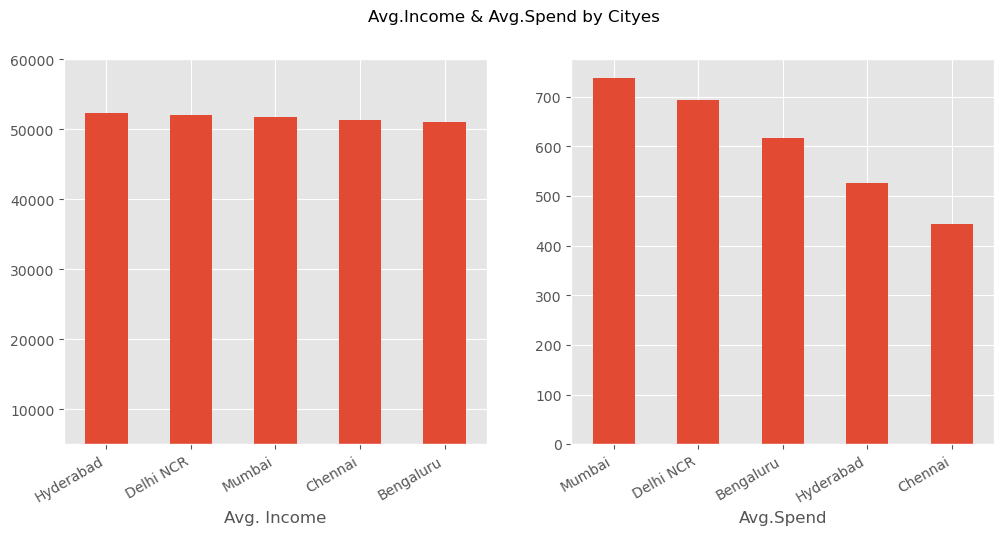

In [24]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))
df_cust.groupby("city")["avg_income"].mean().sort_values(ascending=False).plot(kind="bar",ax=ax[0],xlabel="Avg. Income")
Merged_df.groupby("city")["spend"].mean().sort_values(ascending=False).plot(kind="bar",ax=ax[1],xlabel="Avg.Spend")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha="right")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
fig.suptitle("Avg.Income & Avg.Spend by Cityes", fontsize=12)
ax[0].set_ylim(5000, 60000)
plt.show()


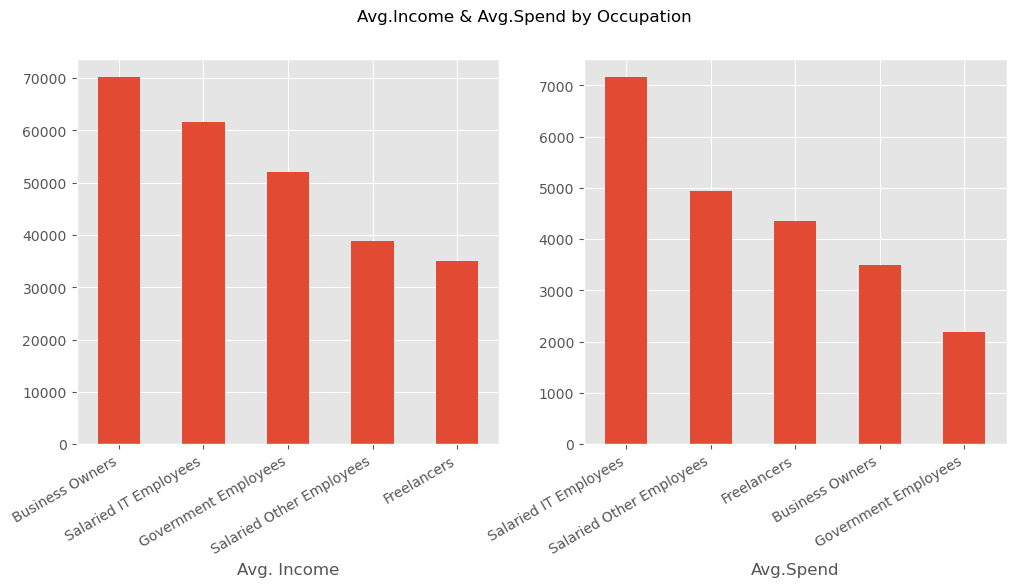

In [25]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))
df_cust.groupby("occupation")["avg_income"].mean().sort_values(ascending=False).plot(kind="bar",ax=ax[0],xlabel="Avg. Income")
Merged_df.groupby("occupation")["Avg_monthly_spend"].sum().sort_values(ascending=False).plot(kind="bar",ax=ax[1],xlabel="Avg.Spend")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha="right")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
fig.suptitle("Avg.Income & Avg.Spend by Occupation ", fontsize=12)
plt.show()

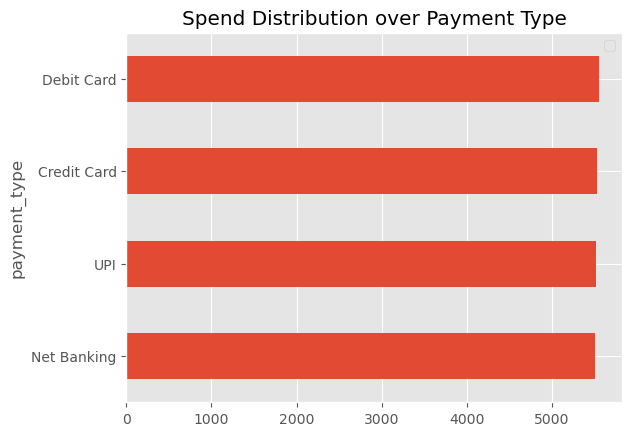

In [26]:
paytype_spend = Merged_df.pivot_table(values="Avg_monthly_spend",index="payment_type",aggfunc="sum").sort_values(by="Avg_monthly_spend")
paytype_spend.plot(kind="barh")
plt.title("Spend Distribution over Payment Type")
plt.legend("")

plt.show()

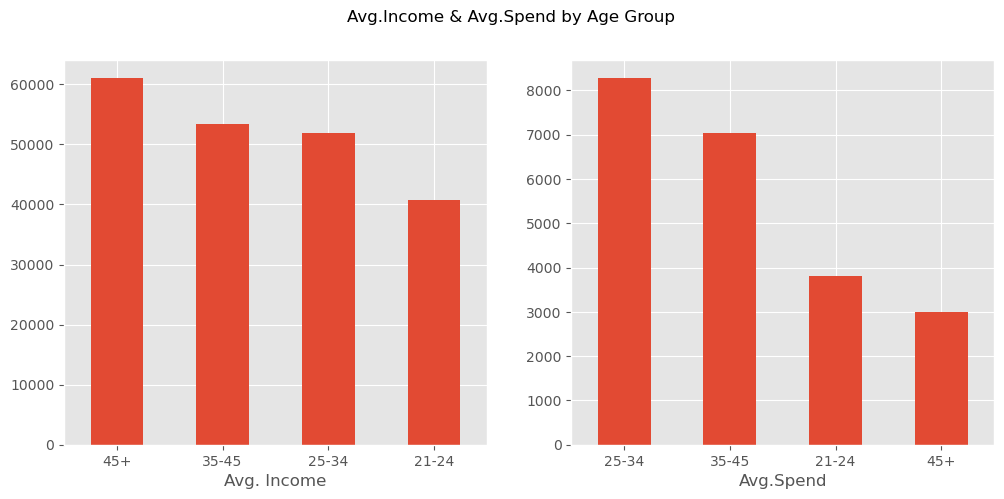

In [27]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))
df_cust.groupby("age_group")["avg_income"].mean().sort_values(ascending=False).plot(kind="bar",ax=ax[0],xlabel="Avg. Income")
Merged_df.groupby("age_group")["Avg_monthly_spend"].sum().sort_values(ascending=False).plot(kind="bar",ax=ax[1],xlabel="Avg.Spend")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha="center")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0, ha="center")
fig.suptitle("Avg.Income & Avg.Spend by Age Group ", fontsize=12)
plt.show()

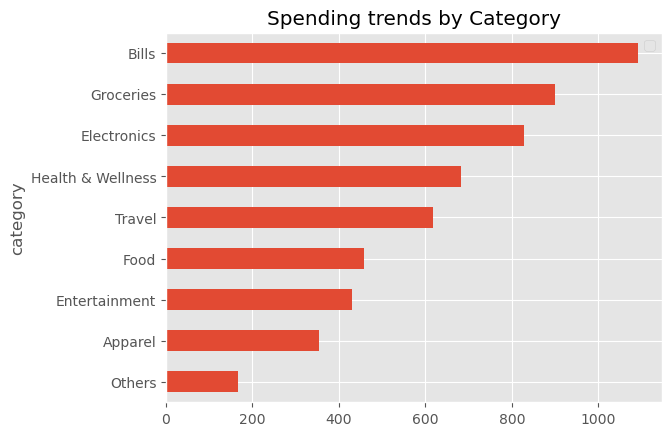

In [28]:
spend_by_category = round(df_spend.pivot_table(values="spend",index="category").sort_values(by="spend",ascending=True),2)
spend_by_category.plot(kind="barh")
plt.title("Spending trends by Category")
plt.legend("")
plt.show()